# MOVIE COLLECTION PREDICTION

In [49]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [50]:
data_x = pd.read_csv("Movie_collection_Independent.csv")
data_y = pd.read_csv("Movie_collection_Target.csv")

In [51]:
print(data_x.shape)
data_x.head

(506, 19)


<bound method NDFrame.head of      Marketin_expense  Production_expense  Multiplex_coverage     Budget  \
0             20.1264               59.62               0.462  36524.125   
1             20.5462               69.14               0.531  35668.655   
2             20.5458               69.14               0.531  39912.675   
3             20.6474               59.36               0.542  38873.890   
4             21.3810               59.36               0.542  39701.585   
..                ...                 ...                 ...        ...   
501           21.2526               78.86               0.427  36624.115   
502           20.9054               78.86               0.427  33996.600   
503           21.2152               78.86               0.427  38751.680   
504           22.1918               78.86               0.427  37740.670   
505           20.9482               78.86               0.427  33496.650   

     Movie_length  Lead_ Actor_Rating  Lead_Actress_ratin

In [52]:
print(data_y.shape)
data_y.head()

(506, 1)


,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


In [53]:
data_x.describe()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.218182,260.832095,39.181818,545.043478,0.551383,0.361660,0.191700,0.306324
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.169624,104.779133,12.513697,106.332889,0.497845,0.480957,0.394028,0.461422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,0.000000,0.000000,0.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.490000,223.796000,28.000000,465.000000,0.000000,0.000000,0.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,159.980000,254.400000,39.000000,535.500000,1.000000,0.000000,0.000000,0.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.610000,283.416000,50.000000,614.750000,1.000000,1.000000,0.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketin_expense     506 non-null    float64
 1   Production_expense   506 non-null    float64
 2   Multiplex_coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  3D_available         506 non-null    int

In [55]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(data_x, data_y, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

In [56]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(284, 19)
(284, 1)
(95, 19)
(95, 1)


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)


In [58]:
print(x_test.shape)

(127, 19)


In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[19]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                600       
_________________________________________________________________
dense_9 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 31        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-2), metrics=['mae'])


c:\Users\Sahib Preet Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [63]:
model_history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid,y_valid))

Epoch 1/100


9/9 [==============================] - 1s 37ms/step - loss: 3.7051 - mae: 1.6837 - val_loss: 1.5134 - val_mae: 1.0270
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.8049 - mae: 0.7017 - val_loss: 0.7741 - val_mae: 0.6938
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5344 - mae: 0.5752 - val_loss: 0.5643 - val_mae: 0.5909
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4031 - mae: 0.4938 - val_loss: 0.4334 - val_mae: 0.5210
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3196 - mae: 0.4360 - val_loss: 0.3577 - val_mae: 0.4742
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.2654 - mae: 0.3940 - val_loss: 0.3054 - val_mae: 0.4403
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2292 - mae: 0.3646 - val_loss: 0.2627 - val_mae: 0.4063
Epoch 8/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2028 - mae: 0.3400 - val_loss: 0.25

In [64]:
mae_test = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2852 - mae: 0.2786


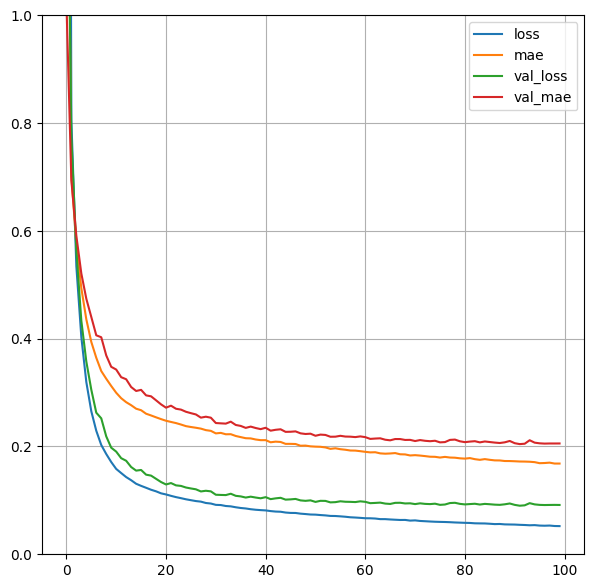

In [65]:
pd.DataFrame(model_history.history).plot(figsize=(7,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [66]:
predicted_values = model.predict(x_test)

first_5_predictions = predicted_values[:5]

print("Predicted values for the first 5 test records:")
print(first_5_predictions)

Predicted values for the first 5 test records:
[[2.514576 ]
 [2.6631563]
 [1.8457   ]
 [2.47076  ]
 [1.7309105]]
